In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.sample(5)

,Category,Message
2893,ham,Babe? You said 2 hours and it's been almost 4 ...
1871,ham,"Aight, I'll text you when I'm back"
5469,ham,Ok lor.
2615,ham,"Sir, hope your day is going smoothly. i really..."
2762,ham,I am not sure about night menu. . . I know onl...


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['Category'] = encoder.fit_transform(df['Category'])

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.duplicated().sum()

415

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5157, 2)

In [14]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

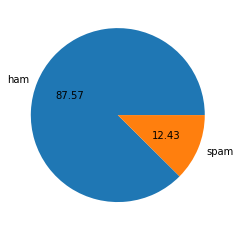

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
df['num_char'] = df['Message'].apply(len)
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,Category,Message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:>

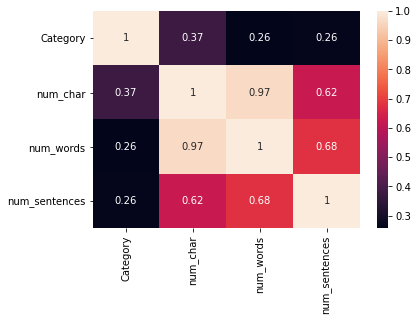

In [19]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [20]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()



In [21]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [22]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [23]:
df.head()


,Category,Message,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [25]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Category'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [27]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [28]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8662790697674418
[[785 120]
 [ 18 109]]
0.4759825327510917


In [29]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9728682170542635
[[905   0]
 [ 28  99]]
1.0


In [30]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [31]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))